In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

try:
    import py3Dmol
except:
    !pip install py3Dmol
    import py3Dmol

In [2]:
path="md_exercises/"

In [3]:
random_array = np.random.random((10,2))
np.savetxt(path+"/random_array.txt", random_array)

In [4]:
!test -d simplemd || git clone --branch cecam2024 https://github.com/GiovanniBussi/simplemd.git

In [5]:
import simplemd

1. Generate initial positions and a simulation box using `method generate_lattice(n)`. Creates $4n^3$ particles and the box. Lennard-Jones units are the following:

$$
r* = \frac{r}{\sigma} \\
E* = \frac{E}{\epsilon} \\
t* = \sigma\sqrt{\frac{m}{\epsilon}}
T* = \frac{\epsilon}{k_B}
$$


In [8]:
# 1. creates box and coordinates
cells, positions = simplemd.generate_lattice(3)

# Lennard-Jones units
print(positions.shape)
print(cells)

(108, 3)
(5.0388, 5.0388, 5.0388)


In [9]:
# no initial coordinates
keys={
'temperature': 0.722,
'tstep': 0.005,
'forcecutoff': 2.5,
'listcutoff': 3.0,
'nstep': 2000,
'nconfig': 10,
'nstat': 10,
}

keys['cell'] = cells
keys['positions'] = positions

In [10]:
smd=simplemd.SimpleMD(**keys) # used kwargs

smd.run()

100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 14215.98it/s]


In [11]:
smd.statistics

[(10,
  0.05,
  np.float64(0.6477294156031876),
  -661.6159695255794,
  np.float64(-556.6838041978631),
  np.float64(-556.6838041978631)),
 (20,
  0.1,
  np.float64(0.3338611573755056),
  -610.6850195958201,
  np.float64(-556.5995121009882),
  np.float64(-556.5995121009882)),
 (30,
  0.15,
  np.float64(0.3366527513945898),
  -611.1978808486158,
  np.float64(-556.6601351226923),
  np.float64(-556.6601351226923)),
 (40,
  0.2,
  np.float64(0.35222714944048794),
  -613.709501694595,
  np.float64(-556.648703485236),
  np.float64(-556.648703485236)),
 (50,
  0.25,
  np.float64(0.40066280726663606),
  -621.5621774419808,
  np.float64(-556.6548026647857),
  np.float64(-556.6548026647857)),
 (60,
  0.3,
  np.float64(0.40633191656482304),
  -622.4778014243136,
  np.float64(-556.6520309408123),
  np.float64(-556.6520309408123)),
 (70,
  0.35000000000000003,
  np.float64(0.37834607607426296),
  -617.9393197790275,
  np.float64(-556.647255454997),
  np.float64(-556.647255454997)),
 (80,
  0.4,
  n

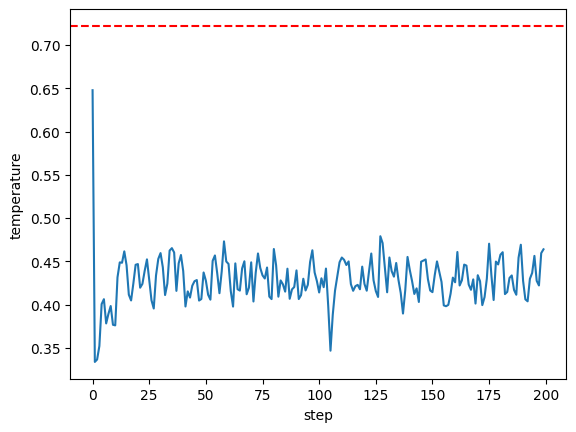

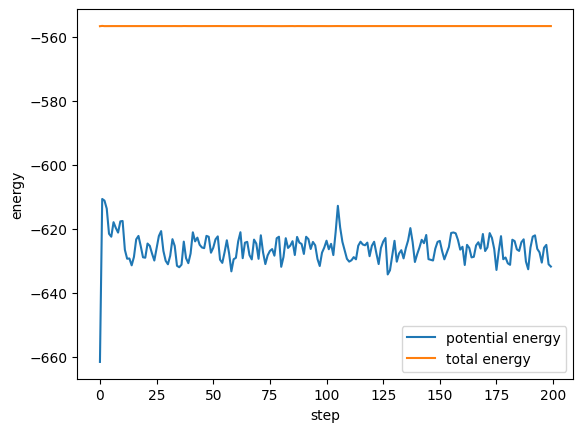

In [27]:
# solution 4.
# plotting instantaneous temperature
fig, ax = plt.subplots()
ax.plot(np.array(smd.statistics).T[2])
ax.axhline(y=keys["temperature"], color='r', linestyle='--')
ax.set_xlabel('step')
ax.set_ylabel('temperature')
plt.show()

# plotting potential energy
fig, ax = plt.subplots()
ax.plot(np.array(smd.statistics).T[3], label="potential energy")
ax.plot(np.array(smd.statistics).T[4], label="total energy")
ax.legend()
ax.set_xlabel('step')
ax.set_ylabel('energy')
plt.show()